In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
from pandas.io.json import json_normalize

In [91]:
import matplotlib
%matplotlib inline

In [132]:
data = np.array([['Col1','Col2'],
                ['1','05MW'],
                ['2','16MW'],
                ['3','05SW1'],
                ['4','05SW2']])

df = pd.DataFrame(data=data[1:,:],
                  index=data[1:,0],
                  columns=data[0,:])

In [133]:
df

,Col1,Col2
1,1,05MW
2,2,16MW
3,3,05SW1
4,4,05SW2


In [74]:
eng = pd.read_csv('FEEDVISOR_temp_snapshot_for_testing_cleaned_engagement_FEEDVISOR.csv')

In [75]:
eng.head()

,accounts,id,_sdc_sequence,_sdc_received_at,_sdc_table_version
0,"{""hits"":[{""general__14d_"":5,""account_performan...",5,100,2018-10-06,0
1,"{""hits"":[{""general__14d_"":6,""account_performan...",5,100,2018-11-06,0
2,"{""hits"":[{""general__14d_"":113,""account_perform...",5,100,2018-09-14,0
3,"{""hits"":[{""general__14d_"":7,""account_performan...",5,100,2019-02-03,0
4,"{""hits"":[{""general__14d_"":54,""account_performa...",5,100,2018-12-22,0


In [76]:
jsons = eng[['accounts']].copy()
eng = eng.drop(columns='accounts')
jsons.accounts = jsons.accounts.apply(lambda x: json.loads(x))
first = json_normalize(jsons.accounts)

In [77]:
second = first[['hits']].copy()
first = first.drop(columns='hits')
eng = pd.concat([first, eng], axis=1)

In [78]:
third = pd.concat([json_normalize(x) for x in second.hits])

In [79]:
new_index = [item for sublist in [[idx] * x for idx, x in enumerate(eng.total_hits.tolist())] for item in sublist]
eng = eng.reindex(new_index)
third.index = eng.index
eng = pd.concat([eng, third], axis=1)

In [82]:
list(eng)

['stats.contract_value.total',
 'total_hits',
 'id',
 '_sdc_sequence',
 '_sdc_received_at',
 '_sdc_table_version',
 'account_performance_use_case__14d_',
 'competition_use_case__14d_',
 'custom_analytics_use_case__14d_',
 'display_name',
 'general__14d_',
 'integrations_use_case__14d_',
 'inventory_use_case__14d_',
 'is_online',
 'last_activity_time',
 'listing_update___bulk__14d_',
 'map_use_case__14d_',
 'name',
 'po_management_use_case__14d_',
 'profitability_use_case__14d_',
 'repricer_use_case__14d_',
 'returns_use_case__14d_',
 'scouting_use_case__14d_',
 'success_center_use_case__14d_']

In [87]:
eng.head()

,stats.contract_value.total,total_hits,id,_sdc_sequence,_sdc_received_at,_sdc_table_version,account_performance_use_case__14d_,competition_use_case__14d_,custom_analytics_use_case__14d_,display_name,...,last_activity_time,listing_update___bulk__14d_,map_use_case__14d_,name,po_management_use_case__14d_,profitability_use_case__14d_,repricer_use_case__14d_,returns_use_case__14d_,scouting_use_case__14d_,success_center_use_case__14d_
0,663692,369,5,100,2018-10-06,0,0,0,0,remotestore,...,1538771547000,0,0,001b000003vmAZrAAM,0,0,4,0,0,1
0,663692,369,5,100,2018-10-06,0,0,0,0,evercart,...,1538766300000,0,0,001b000000yfFcCAAU,0,0,5,0,0,0
0,663692,369,5,100,2018-10-06,0,0,0,0,theonlinedrugstore,...,1538781158000,0,0,001b000003lvB1bAAE,0,0,0,0,0,0
0,663692,369,5,100,2018-10-06,0,0,0,0,smallbox,...,1538783046000,0,0,001b000003s3ScVAAU,0,0,5,0,0,0
0,663692,369,5,100,2018-10-06,0,0,0,0,gemoverstock,...,1538777307000,0,6,0010J00001sqx0MQAQ,0,0,3,0,0,0


In [118]:
num_cols = [x for x in list(eng) if '14d' in x] + ['stats.contract_value.total']

In [121]:
print(eng._sdc_received_at.min(), eng._sdc_received_at.max())

2018-07-19 2019-02-09


In [ ]:
df.iloc[:,:-1] == 1

In [120]:
eng[num_cols].describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
stats.contract_value.total,70612.0,674279.551875,32605.147202,194700.0,664083.0,677703.0,691414.0,700439.0
general__14d_,70612.0,67.599771,180.695486,0.0,0.0,8.0,54.0,3788.0
repricer_use_case__14d_,70612.0,18.377018,51.884029,0.0,0.0,1.0,13.0,2480.0
po_management_use_case__14d_,70612.0,6.294780,91.709542,0.0,0.0,0.0,0.0,3588.0
integrations_use_case__14d_,70612.0,3.523141,33.144165,0.0,0.0,0.0,0.0,1036.0
account_performance_use_case__14d_,70612.0,1.763071,12.937156,0.0,0.0,0.0,0.0,549.0
scouting_use_case__14d_,70612.0,0.490540,8.693467,0.0,0.0,0.0,0.0,774.0
inventory_use_case__14d_,70612.0,0.448012,3.964212,0.0,0.0,0.0,0.0,153.0
map_use_case__14d_,70612.0,0.229621,2.426367,0.0,0.0,0.0,0.0,146.0
custom_analytics_use_case__14d_,70612.0,0.131890,1.023375,0.0,0.0,0.0,0.0,49.0


In [126]:
num_cols += ['name', '_sdc_received_at']

In [100]:
for col in num_cols:
    print(col, eng[col].sum())

account_performance_use_case__14d_ 124494
competition_use_case__14d_ 3016
custom_analytics_use_case__14d_ 9313
general__14d_ 4773355
integrations_use_case__14d_ 248776
inventory_use_case__14d_ 31635
listing_update___bulk__14d_ 0
map_use_case__14d_ 16214
po_management_use_case__14d_ 444487
profitability_use_case__14d_ 2269
repricer_use_case__14d_ 1297638
returns_use_case__14d_ 552
scouting_use_case__14d_ 34638
success_center_use_case__14d_ 3955


No handles with labels found to put in legend.
No handles with labels found to put in legend.


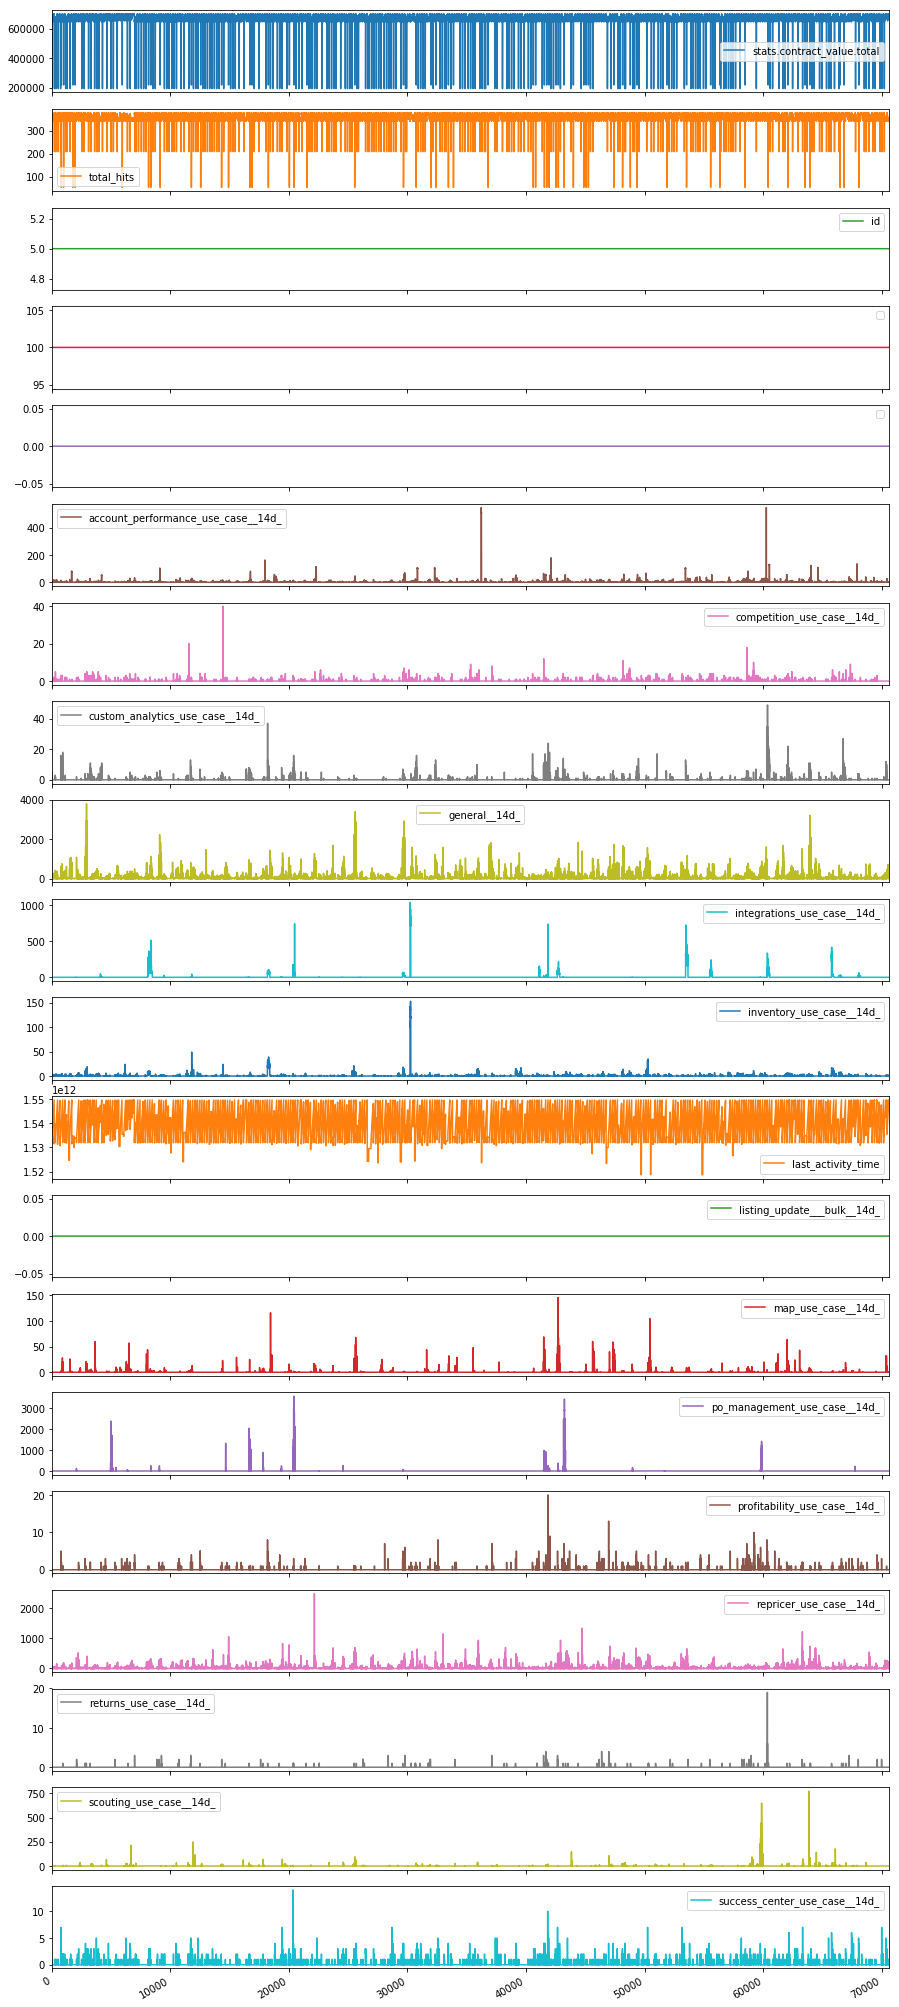

In [131]:
eng.sort_values(by=['name', '_sdc_received_at']).reset_index(drop=True).plot(
    subplots=True, figsize=(15, 40));

In [101]:
smalls = ['listing_update___bulk__14d_', 'returns_use_case__14d_', 'competition_use_case__14d_', 
          'profitability_use_case__14d_', 'success_center_use_case__14d_']

In [102]:
meds = ['custom_analytics_use_case__14d_', 'inventory_use_case__14d_', 'map_use_case__14d_', 'scouting_use_case__14d_']

In [104]:
bigs = ['account_performance_use_case__14d_', 'general__14d_', 'integrations_use_case__14d_', 
        'po_management_use_case__14d_','repricer_use_case__14d_']

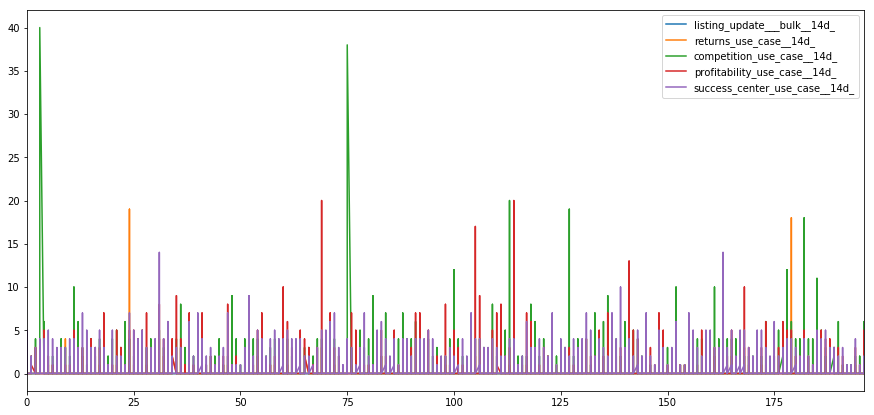

In [106]:
eng[smalls].plot(figsize=(15,7));

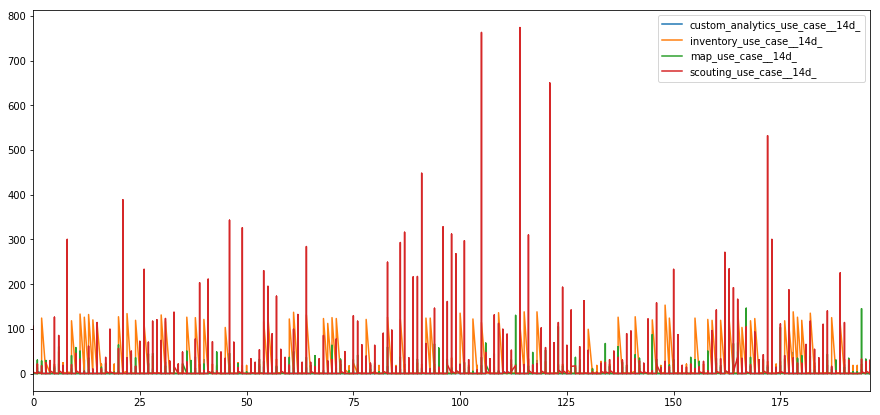

In [107]:
eng[meds].plot(figsize=(15,7));

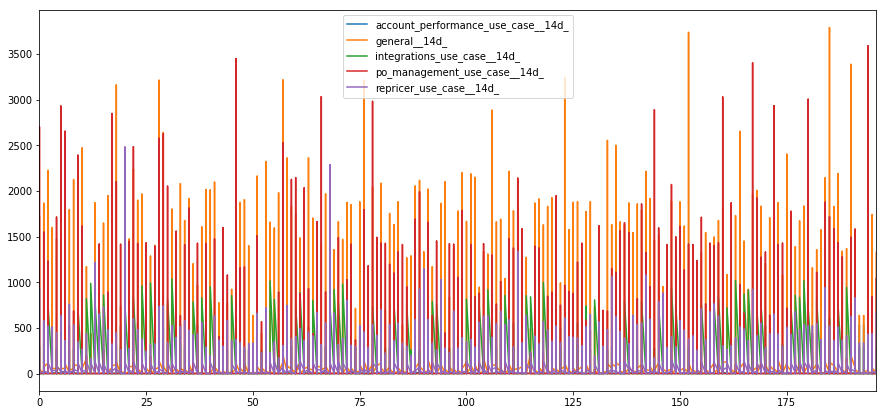

In [108]:
eng[bigs].plot(figsize=(15,7));

In [19]:
eng.to_csv('totango_data.csv', encoding='utf-8')

In [ ]:
df = pd.read_csv('totango_data.csv', index_col=0)

In [38]:
import time

In [50]:
from datetime import datetime

In [59]:
df.last_activity_time = df.last_activity_time.apply(lambda x: datetime.utcfromtimestamp(x / 1000))

In [73]:
'Total_Account_Performance_Use_Case_14D'.title()

'Total_Account_Performance_Use_Case_14D'

In [72]:
''.join(('Total_Account_Performance_Use_Case_14D_30D_Fe'.title()).split('_')) 

'TotalAccountPerformanceUseCase14D30DFe'

In [63]:
['self.schemata.engagement.TOTAL_' + x.upper() + '.str()' for x in feats]

['self.schemata.engagement.TOTAL_ACCOUNT_PERFORMANCE_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_COMPETITION_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_CUSTOM_ANALYTICS_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_GENERAL__14D_.str()',
 'self.schemata.engagement.TOTAL_INTEGRATIONS_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_INVENTORY_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_IS_ONLINE.str()',
 'self.schemata.engagement.TOTAL_LAST_ACTIVITY_TIME.str()',
 'self.schemata.engagement.TOTAL_LISTING_UPDATE___BULK__14D_.str()',
 'self.schemata.engagement.TOTAL_MAP_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_PO_MANAGEMENT_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_PROFITABILITY_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_REPRICER_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_RETURNS_USE_CASE__14D_.str()',
 'self.schemata.engagement.TOTAL_SCOUTING_USE_CASE__14D_.str()',
 'self.schemata.eng

In [61]:
feats = ['account_performance_use_case__14d_',
         'competition_use_case__14d_',
         'custom_analytics_use_case__14d_',
         'general__14d_',
         'integrations_use_case__14d_',
         'inventory_use_case__14d_',
         'is_online',
         'last_activity_time',
         'listing_update___bulk__14d_',
         'map_use_case__14d_',
         'po_management_use_case__14d_',
         'profitability_use_case__14d_',
         'repricer_use_case__14d_',
         'returns_use_case__14d_',
         'scouting_use_case__14d_',
         'success_center_use_case__14d_']

In [32]:
''.join([x.title() for x in 'NUMBER_OF_ENGAGEMENT_FEATURES_IN_USE_FE'.split('_')])

'NumberOfEngagementFeaturesInUseFe'

In [29]:
df._sdc_sequence.nunique()

1

['name', '_sdc_received_at'] - unique key
total hits, id, sdc seq, sdc table version - seem to be totally useless
stats.contract_value.total looks good - not summable?
is_online, last_acitivty_time, look good, not summable
all the rest - aggregate

In [49]:
x = [e for e in list(df) if e not in ('display_name', 'name', '_sdc_received_at' , 'total_hits', 'id', 
                                  '_sdc_sequence', '_sdc_table_version')]
x

['stats.contract_value.total',
 'account_performance_use_case__14d_',
 'competition_use_case__14d_',
 'custom_analytics_use_case__14d_',
 'general__14d_',
 'integrations_use_case__14d_',
 'inventory_use_case__14d_',
 'is_online',
 'last_activity_time',
 'listing_update___bulk__14d_',
 'map_use_case__14d_',
 'po_management_use_case__14d_',
 'profitability_use_case__14d_',
 'repricer_use_case__14d_',
 'returns_use_case__14d_',
 'scouting_use_case__14d_',
 'success_center_use_case__14d_']

In [24]:
df = move_column_to_front(df, ['name', '_sdc_received_at'])
df = df.sort_values(['name', '_sdc_received_at'])

In [22]:
def move_column_to_front(df, cols_to_move):
    cols = list(df)
    for col in cols_to_move:
        cols.insert(0, cols.pop(cols.index(col)))
    return df.reindex(columns=cols)